<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/K_Means_%26_DBSCAN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 클러스터링(Clustering)

* 클러스터(Cluster) : 특성이 비슷한 것들
* 클러스터링(Clustering) : 특성이 비슷한 것들을 모은 것(군집)
* 클러스터링 목적
    - 더 빠른 연산 ( 매번 모든 데이터의 특성들을 분석해서 분류하고 연산하면 연산비가 증가)
    - 새로운 특성을 가진 데이터가 새로 생기면 클러스터에 편입
    - 클러스터들을 모아서 더 거대한 클러스터를 생성

1. K-Means 클러스터링
    - 데이터들을 K개의 클러스터로 그룹화 하는 알고리즘
    - 각 클러스터들은 중심을 가지며 데이터 포인트는 가장 가까운 중심에 할당됨

  (1) 동작과정
   1) 클러스터의 중심점을 임의로 선택(K가 의미하는 것은 클러스터의 수)
   2) 각 데이터 포인트를 가장 가까운 중심점에 할당
   3) 클러스터에 속한 데이터 포인트들의 평균을 계산하여 새로운 중심점을 갱신
   4) 중심점이 더 이상 변경되지 않을 때까지 2), 3)을 반복 수행
   * 중심점이 더 이상 변경되지 않는다. = 중심점이 확정되었다. = 다 모였다. = 클러스터 완성

  (2) 장점
    - 단순하면서도 효율적인 알고리즘
    - 대용량 데이터셋에서도 적용이 가능
    - 클러스터의 수를 지정하기 용이하다

  (3) 단점
    - 클러스터의 모양이 원형이라고 가정하므로
      다른 모양의 클러스터들은 잘 클러스터링하기 어렵다.
    - 초기 중심점의 위치에 따라 결과가 달라질 수 있으므로 초기화 방법에 따른 영향을 받을 수 있다.
      (초기 중심점을 랜덤하게 뽑기 때문에 랜덤의 결과에 영향을 받을 수 있다.)

  (4) 공식
    - 중심점 계산 : 해당 클러스터에 속한 모든 데이터 포인트의 평균(mean)으로 계산
    - 중심점 = 클러스터 / 데이터 포인트의 개수
    - 데이터 포인트 할당 : 각 데이터 포인트는 가장 가까운 중심점에 할당
                        거리를 기반으로 할당(유클리드 거리)
    - 거리(x, m) = n은 데이터 포인트의 차원 수, xj는 데이터포인트 x의 j번째 차원의 값

2. DBXCAN (Density-Based Spatial Clustering of Application With Noise)
   - 노이즈를 가진 밀도기반 클러스터링
   - 데이터 포인트 주변의 밀도를 기반으로 클러스터를 형성하는 알고리즘

   (1) 동작 과정
     1) 임의의 데이터 포인트를 선택한다.
     2) 선택된 데이터 포인트에서 일정 반경(epsilon) 내에 있는 다른 데이터 포인트들을 찾는다.
     3) 이웃 데이터 포인트의 개수가 최소 개수(minPts)이상이면 해당 데이터 포인트들을 하나의 클러스터로 할당한다.
     4) 이웃 데이터 포인트들도 반복적으로 클러스터에 추가하면서 클러스터를 확장시킨다.
     5) 클러스터에 포함되지 않은 데이터 포인트들은 노이즈(noise) 처리한다.

   (2) 장점
     - 클러스터의 모양을 가정하지 않기 때문에 다양한 모양의 클러스터를 찾을 수 있다.
     - 클러스터의 개수를 미리 지정할 필요가 없다.
     - 노이즈를 처리할 수가 있어서 데이터에서 이상치를 식별할 수 있다.

   (3) 단점
     - 성능이 epsilon(반경), minPts(최소인접포인트개수) 값에 따라 민감하게 반응 할 수 있다.
     - 대규모 데이터셋 처리시에 계산 비용이 증가할 수 있다.

   (4) 공식
     - 거리계산을 사용(유클리드 거리)
     - 데이터 포인트간의 거리가 epsilon 이내인 경우 이웃 데이터 포인트로 판단
     - 나머지는 noise 처리한다.











In [4]:
# K-Means 클러스터링
def p(str):
    print(str, '\n')


# 라이브러리 로딩

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# random seed 설정
np.random.seed(42)

# 중심점이 4개인 150개의 점 데이터를 무작위 생성
points, labels = make_blobs(
    n_samples = 150, # 샘플데이터 수
    centers = 4, # 중심점 수
    n_features = 2, # feature 수
    random_state = 42 # 랜덤 시드 값
)

In [5]:
# 무작위로 생성된 점의 좌표 10개 출력
print(points.shape, '\n', points[:10])
print(labels.shape, '\n', labels[:10])

points_df = pd.DataFrame(points, columns = ['X', 'Y'])
p(points_df)

(150, 2) 
 [[-2.54502366 10.57892978]
 [-3.34841515  8.70507375]
 [-8.55733589  6.7008234 ]
 [ 6.52606474  2.1477475 ]
 [-6.36459192 -6.36632364]
 [-6.25395984 -7.73726715]
 [-3.18611962  9.62596242]
 [-2.97867201  9.55684617]
 [-7.35155906 -5.791159  ]
 [-7.72642091 -8.39495682]]
(150,) 
 [0 0 3 1 2 2 0 0 2 2]
            X          Y
0   -2.545024  10.578930
1   -3.348415   8.705074
2   -8.557336   6.700823
3    6.526065   2.147747
4   -6.364592  -6.366324
..        ...        ...
145 -3.110904  10.866564
146 -7.609994  -6.663651
147 -3.109836   8.722592
148 -2.417437   7.026717
149 -7.763485  -6.726384

[150 rows x 2 columns] 



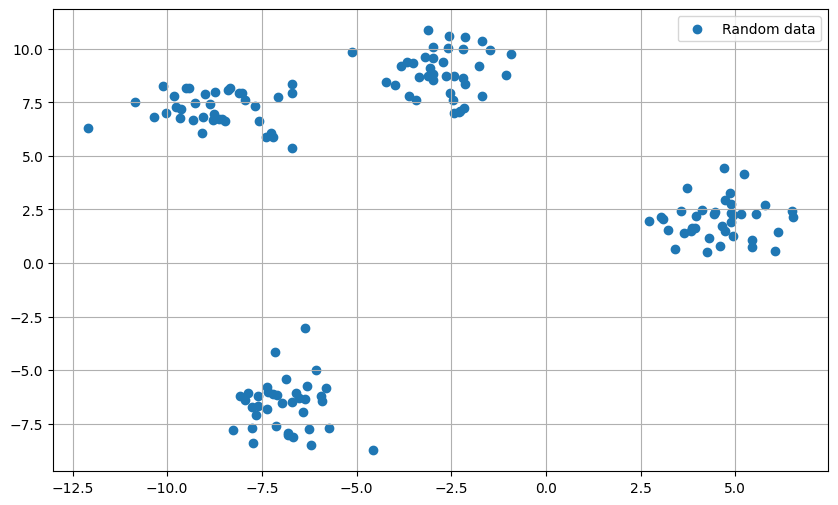

In [6]:
# # 그래프 설정 및 그리기
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(111)
axes.scatter(points_df['X'],points_df['Y'], label = 'Random data')
axes.grid()
axes.legend()
plt.show()


In [7]:
## K-Means 클러스터 생성
from sklearn.cluster import KMeans

In [8]:
# 클러스터 생성
k_cluster = KMeans(n_clusters=4) # 4개의 클러스터
# 클러스터에 데이터 입력해서 학습
k_cluster.fit(points)

KMeans(n_clusters=4)

In [9]:
p(k_cluster.labels_) # 레이블
p(np.shape(k_cluster.labels_)) #(150,)
p(np.unique(k_cluster.labels_)) # 레이블 unique 값들

[3 3 1 0 2 2 3 3 2 2 1 1 0 1 2 0 1 0 0 0 3 1 2 1 2 1 1 3 1 0 0 3 2 1 0 0 2
 1 2 3 0 1 3 3 2 0 3 2 3 1 0 0 0 3 3 1 0 2 1 3 1 1 2 2 2 0 2 2 0 0 1 3 0 3
 3 0 0 2 0 3 3 1 3 2 0 3 0 2 1 0 1 0 3 1 2 0 1 1 3 0 2 2 3 3 2 3 1 0 0 1 2
 0 0 1 1 0 1 2 1 3 1 1 0 1 3 2 1 2 0 1 3 3 0 2 3 2 2 2 0 1 3 3 2 2 3 3 2 3
 3 2] 

(150,) 

[0 1 2 3] 



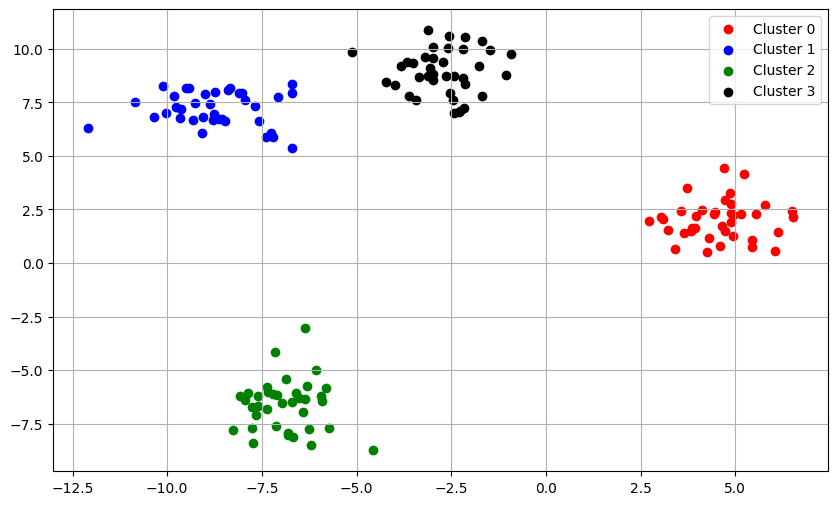

In [10]:
# 색상 딕셔너리
color_di = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'black'
}

# # 그래프 그리기
plt.figure(figsize=(10,6))
for cluster in range(4):
    cluster_sub = points[k_cluster.labels_ == cluster]
    plt.scatter(
        cluster_sub[:, 0],           # 첫번째 feature
        cluster_sub[:, 1],           # 두번째 feature
        c = color_di[cluster],       # 클러스터별 색상
        label = f'Cluster {cluster}' # 클러스터별 레이블
    )
plt.grid()
plt.legend()
plt.show()

In [11]:
# 라이브러리
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles

# n_samples : 샘플의 수
# factor : 원 안의 원과 원 바깥의 원의 크기 비율로
#          값이 작을수록 안쪽 원이 작아짐, 값이 커질수록 안쪽 원이 커짐
# noise : 값이 0에 가까울수록 노이즈가 적고 값이 높을수록 노이즈가 많음
circle_points, circle_labels = make_circles(n_samples=150, factor=0.5, noise=0.01)

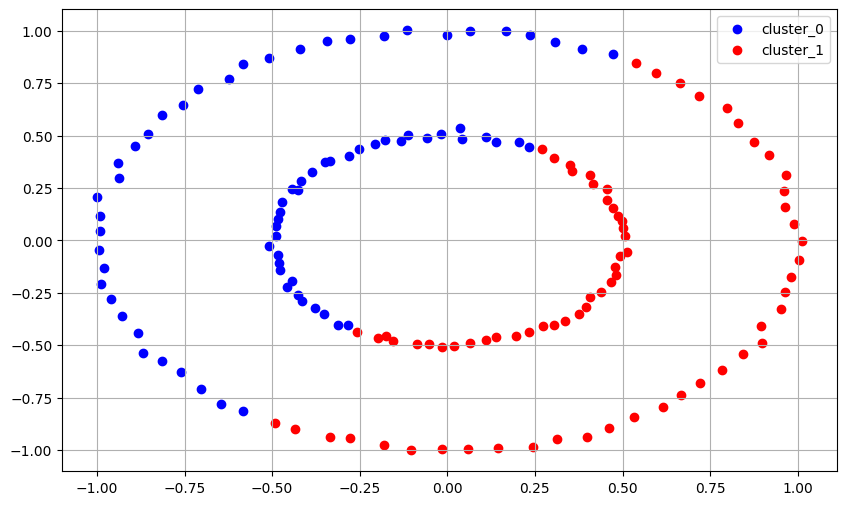

In [12]:
# 그래프 크기
plt.figure(figsize=(10, 6))

# 모델 생성
circle_kmeans = KMeans(n_clusters=2)

# 모델 학습
circle_kmeans.fit(circle_points)

# 색상 딕셔너리
color_di = {0:'blue', 1:'red'}

# # 스캐터
for i in range(2):
    cluster_sub = circle_points[circle_kmeans.labels_ == i]
    plt.scatter(
        cluster_sub[:, 0],
        cluster_sub[:, 1],
        c = color_di[i],
        label = f'cluster_{i}'
    )
plt.legend()
plt.grid(True)
plt.show()


In [14]:
## make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, random_state=163)
p(X)
p(y)

# 변환 행렬
transformation = [[0.6, -0.6], [-0.3, 0.8]]

# dot() : 배열과 행렬사이의 행렬곱셈을 수행할 수 있고 X배열의 모든 데이터 포인트에 대한 선형변환을 적용시킬 수 있다
diag_points = np.dot(X, transformation)
p(diag_points)


[[ 3.85309507e+00 -8.86718807e-01]
 [ 6.06010461e+00 -9.32975391e+00]
 [ 5.87809093e+00 -1.03775117e+01]
 [ 6.13722259e+00 -8.99203529e+00]
 [-1.93062002e+00 -4.96849030e+00]
 [ 4.95266983e+00  3.59353557e-01]
 [ 2.34662588e+00 -2.23174379e-01]
 [-1.76526778e+00 -4.59469013e+00]
 [ 3.11742333e+00  1.30688420e+00]
 [ 4.44574161e+00 -1.26859699e+00]
 [ 5.02054574e+00 -1.28002292e+00]
 [ 6.09768203e+00 -1.05833487e+01]
 [ 2.06294592e-01 -3.99461480e+00]
 [ 6.27321234e+00 -8.33143212e+00]
 [-7.59127872e-01 -3.51687238e+00]
 [ 3.50440741e+00  1.49219622e+00]
 [ 4.37650806e+00 -3.71817701e-01]
 [-1.35290473e+00 -2.56392518e+00]
 [ 3.29954322e+00  9.10765293e-01]
 [-1.54639889e+00 -3.12131433e+00]
 [-1.18716009e+00 -6.39365816e+00]
 [-2.30923619e+00 -4.07062513e+00]
 [ 3.16139658e+00 -3.50717658e-01]
 [ 4.66579314e+00 -4.90885886e-01]
 [ 3.59219445e-01 -5.33625093e+00]
 [-1.00803513e-02 -2.57507643e+00]
 [ 8.35198616e+00 -7.75690929e+00]
 [-1.85192885e+00 -2.86222370e+00]
 [ 6.31262455e+00 -8

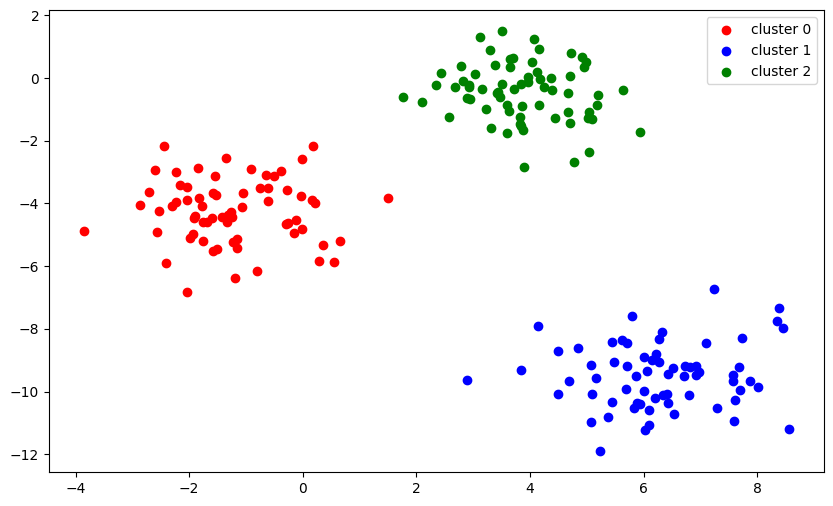

In [15]:
# 그래프 사이즈
figure = plt.figure(figsize=(10, 6))

# 서브플랏 추가
axes = figure.add_subplot(111)

# 클러스터 생성
diag_kmeans = KMeans(n_clusters=3)

# 모델 학습
diag_kmeans.fit(X)

# 색상 딕셔너리
color_di = {0: "red", 1: "blue", 2: "green"}

# # 클러스터별 색상 적용하여 스캐터 그리기
for cluster in range(3):
   cluster_sub = X[diag_kmeans.labels_ == cluster]
   axes.scatter(cluster_sub[:, 0], cluster_sub[:, 1], c=color_di[cluster],
                label=f"cluster {cluster}")
plt.legend()
plt.show()

In [18]:
# DBSCAN : 밀도 기반 클러스터링 알고리즘

# 라이브러리 로딩
from sklearn.cluster import DBSCAN


# 반경, 최소인접 포인트수 결정
epsilon = 0.5 # 반경
minPts = 3 # 최소 인접 포인트 수

# DBSCAN 생성
# eps : 클러스터의 반경
# min_samples : 클러스터를 구성하기 위한 최소 인접 포인트의 개수
# metric : 거리측정 방법을 지정하는 매개변수, 기본적으로 유클리드 거리
# algorithm : 클러스터링 알고리즘을 선택하는 매개변수 , 기본값 auto
diag_dbscan = DBSCAN(eps = epsilon, min_samples=minPts)

# 학습
diag_dbscan.fit(diag_points)

DBSCAN(min_samples=3)

5 

[ 0  1  1  1  2  0  0  2  0  0  0  1  2  1  2  0  0  2  0  2  3  2  0  0
  3  2  1  2  1  1  1 -1  0  1  1  1  0  0  1  2  2  2  1  0  2  0  1  0
  1  2  0  2  0  1  2  2  0  2  2  1 -1  2  2  0  2  1  2  1  0  0  3  1
  2  1  0  1  2  0  1  2  2  1  1  1  0  1 -1  1 -1  1  1  2  2  1  2  0
  1  0  2  1  1  1  4 -1  1  0  1  0  2  1  2  1  2 -1  1  2  0  2  2  1
  0  4  1  0  2  0  0  0  1  2  0  2  1  2  2  0  3  0  2  2  3  0  2  0
  2  1  0  0  1  0  0  2  0  2  0  0  2  0  2  0  0  2  2  0  1  1  0  0
  2  1  1  0  0 -1  0  0 -1  1  3  1  1  1  1  2  1  0  0  2  2  1  0  2
  1  3  1  4  1  0  0  2] 



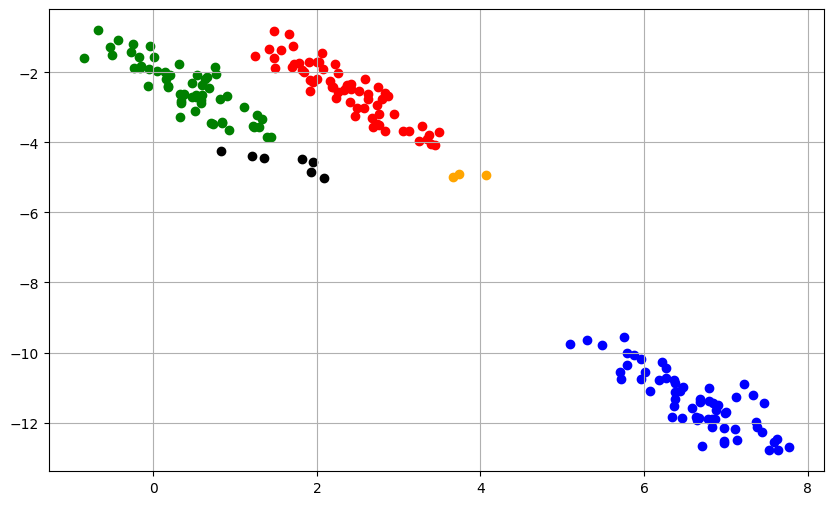

In [19]:
# 클러스터의 수 , DBSCAN의 클러스터번호는 음수값을 포함하므로 +1 해줌
n_cluster = max(diag_dbscan.labels_) +1
p(n_cluster)

# 각 데이터포인트의 클러스터 번호
# -1 : noise, 0~4 : 클러스터 번호
p(diag_dbscan.labels_)

figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(111)
color_di = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'orange'}

for i in range(n_cluster):
    cluster_sub = diag_points[diag_dbscan.labels_==i]
    plt.scatter(
        cluster_sub[:,0],
        cluster_sub[:,1],
        c = color_di[i]
    )
axes.grid(True)
plt.show()